In [2]:
#!pip install stata_setup
import sys
print(sys.executable)
import stata_setup
stata_setup.config("C:\\Program Files\\StataNow19", "se")

c:\Users\maico\AppData\Local\Programs\Python\Python310\python.exe

  ___  ____  ____  ____  ____ ®
 /__    /   ____/   /   ____/      StataNow 19.5
___/   /   /___/   /   /___/       SE—Standard Edition

 Statistics and Data Science       Copyright 1985-2025 StataCorp LLC
                                   StataCorp
                                   4905 Lakeway Drive
                                   College Station, Texas 77845 USA
                                   800-782-8272        https://www.stata.com
                                   979-696-4600        service@stata.com

Stata license: Unlimited-user network, expiring 16 Aug 2025
Serial number: 401909309297
  Licensed to: Mahicol Stiben Ramírez González
               Universidad de los Andes

Notes:
      1. Unicode is supported; see help unicode_advice.
      2. Maximum number of variables is set to 5,000 but can be increased;
          see help set_maxvar.


# Call Stata using magic commands
The stata magic is used to execute Stata commands in an IPython environment. In a notebook cell, we put Stata commands underneath the %%stata cell magic to direct the cell to call Stata. The following commands load the auto dataset and summarize the mpg variable. The Stata output is displayed underneath the cell.

In [10]:
%%stata
sysuse auto, clear
summarize mpg


. sysuse auto, clear
(1978 automobile data)

. summarize mpg

    Variable |        Obs        Mean    Std. dev.       Min        Max
-------------+---------------------------------------------------------
         mpg |         74     21.2973    5.785503         12         41

. 


Stata's graphs can also be displayed in the IPython environment. Here we create a scatterplot of car mileage against price by using the %stata line magic.

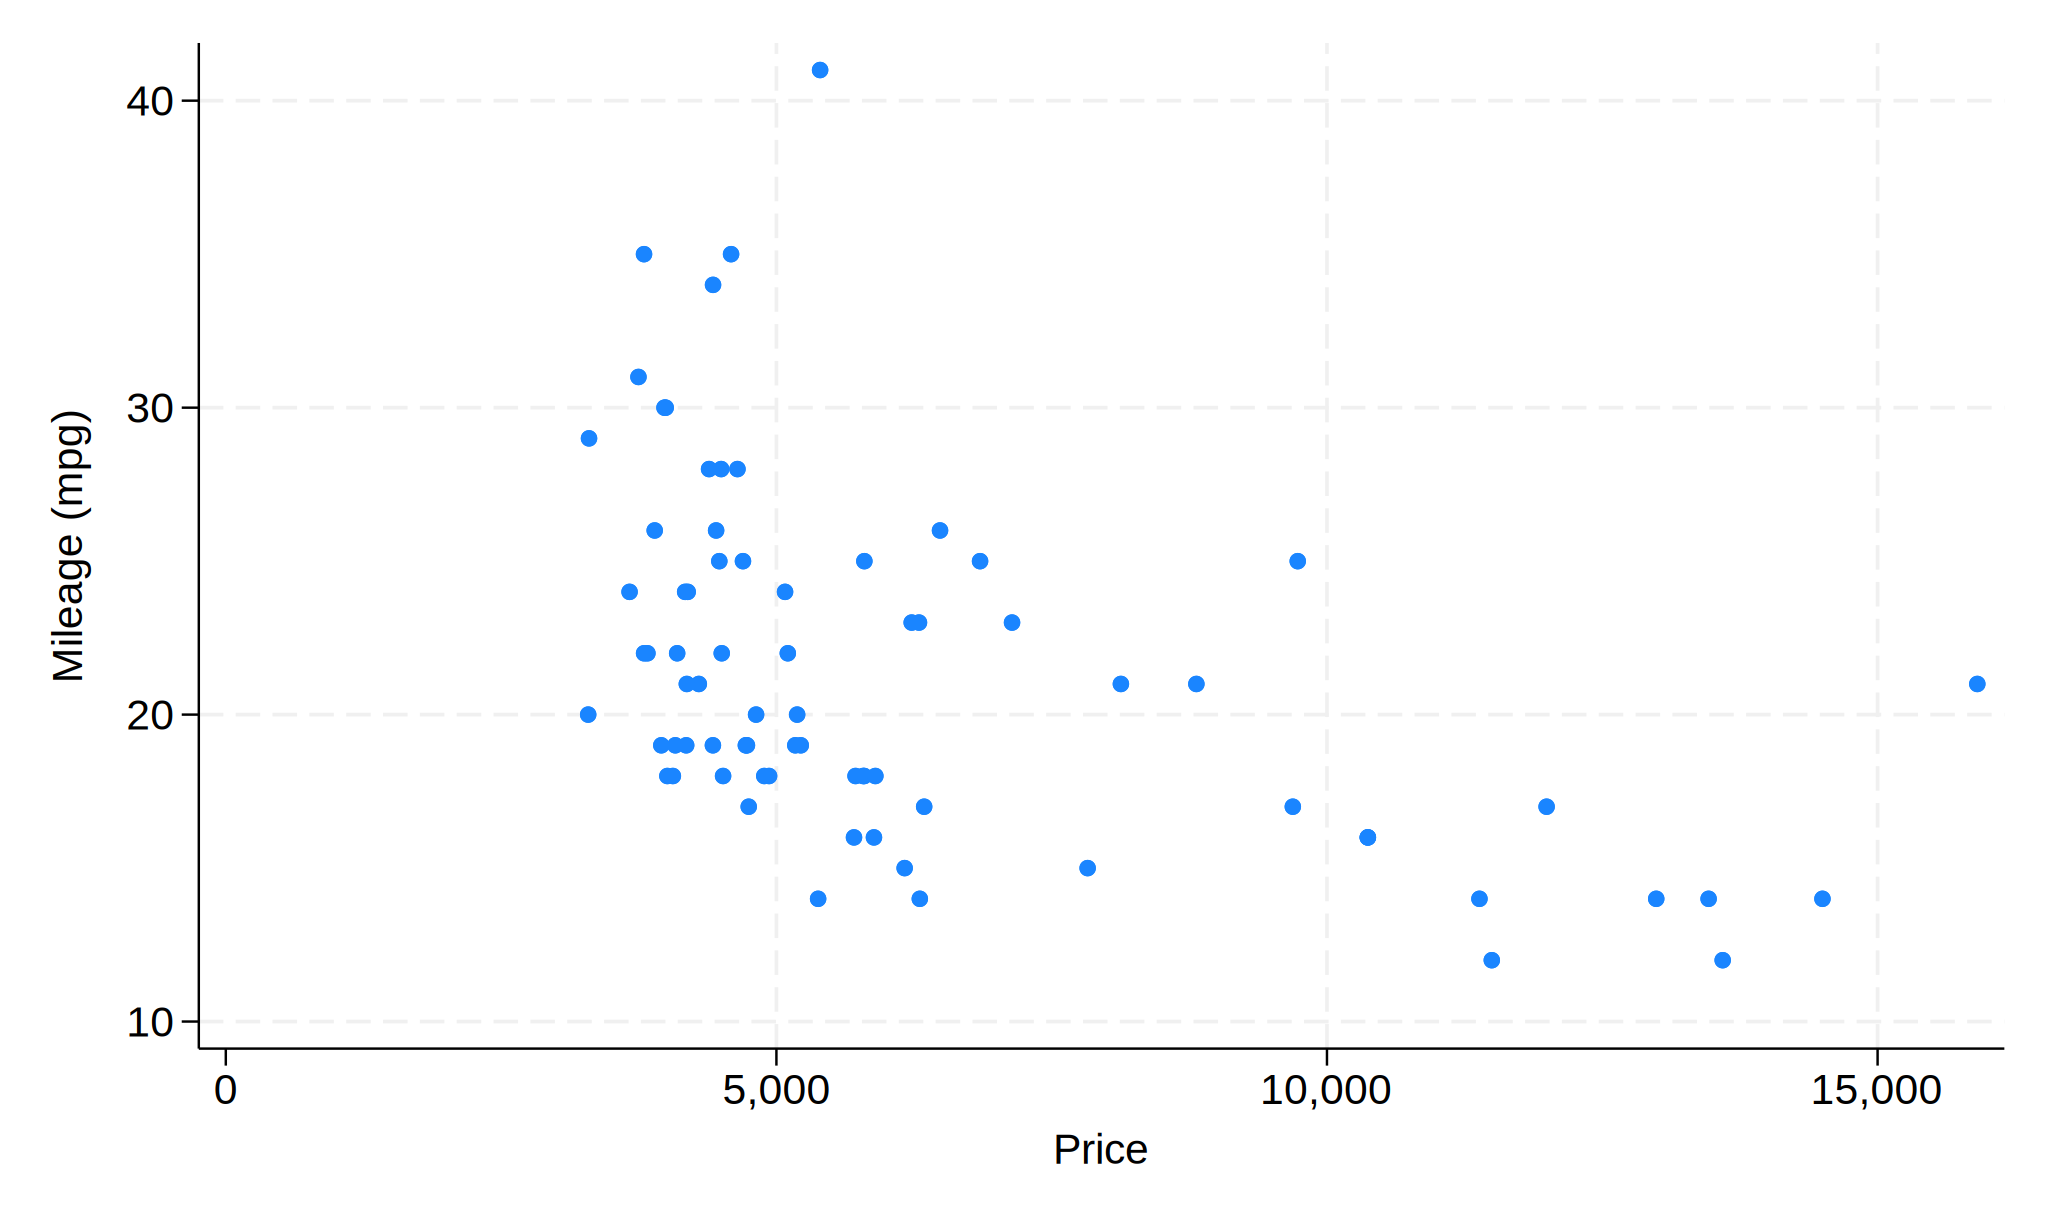

In [11]:
%stata scatter mpg price

Next, we load Python data into Stata, perform analyses in Stata, and then pass Stata returned results to Python for further analysis, using the Second National Health and Nutrition Examination Survey (NHANES II; McDowell et al. 1981).

NHANES II, a dataset concerning health and nutritional status of adults and children in the US, contains 10,351 observations and 58 variables and is stored in a CSV file called nhanes2.csv. Among hese variables is an indicator variable for hypertension (highbp) and the continuous variables age and weight.

We use pandas method read_csv() to read the data from the .csv file into a pandas dataframe named nhanes2.

In [12]:
# Install requests if not already installed
#!pip install requests
import pandas as pd
import io
import requests

data = requests.get("https://www.stata.com/python/pystata19/misc/nhanes2.csv").content
nhanes2 = pd.read_csv(io.StringIO(data.decode("utf-8")))
nhanes2

,sampl,strata,psu,region,smsa,location,houssiz,sex,race,age,...,region4,smsa1,smsa2,smsa3,rural,loglead,agegrp,highlead,bmi,highbp
0,1400,1,1,S,2,1,4,Male,White,54,...,0,0,1,0,0,NaN,50-59,NaN,20.495686,0
1,1401,1,1,S,2,1,6,Female,White,41,...,0,0,1,0,0,2.564949,40-49,lead<25,21.022337,0
2,1402,1,1,S,1,1,6,Female,Other,21,...,0,1,0,0,0,NaN,20-29,NaN,24.973860,0
3,1404,1,1,S,2,1,9,Female,White,63,...,0,0,1,0,0,NaN,60-69,NaN,35.728722,1
4,1405,1,1,S,1,1,3,Female,White,64,...,0,1,0,0,0,2.995732,60-69,lead<25,27.923803,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10346,48760,32,2,MW,4,48,5,Female,White,35,...,0,0,0,1,1,NaN,30-39,NaN,20.355173,0
10347,48763,32,2,MW,4,48,2,Female,White,33,...,0,0,0,1,1,1.945910,30-39,lead<25,41.645557,1
10348,48764,32,2,MW,4,48,1,Female,White,60,...,0,0,0,1,0,NaN,60-69,NaN,35.626114,0
10349,48768,32,2,MW,4,48,1,Female,White,29,...,0,0,0,1,0,NaN,20-29,NaN,19.204464,0


We load the dataframe into Stata by specifying the -d argument of the %%stata magic, and then within Stata, we fit a logistic regression model using age, weight, and their interaction as predictors of the probability of hypertension. We also push Stata's estimation results displayed by ereturn list, including the coefficient vector e(b) and variance–covariance matrix e(V), into a Python dictionary called myeret by specifying the -eret argument.

In [13]:
%%stata -d nhanes2 -eret myeret
logistic highbp c.age##c.weight
ereturn list


. logistic highbp c.age##c.weight

Logistic regression                                    Number of obs =  10,351
                                                       LR chi2(3)    = 2381.23
                                                       Prob > chi2   =  0.0000
Log likelihood = -5860.1512                            Pseudo R2     =  0.1689

------------------------------------------------------------------------------
      highbp | Odds ratio   Std. err.      z    P>|z|     [95% conf. interval]
-------------+----------------------------------------------------------------
         age |   1.108531   .0080697    14.15   0.000     1.092827     1.12446
      weight |   1.081505    .005516    15.36   0.000     1.070748    1.092371
             |
       c.age#|
    c.weight |   .9992788   .0000977    -7.38   0.000     .9990873    .9994703
             |
       _cons |   .0002025   .0000787   -21.89   0.000     .0000946    .0004335
-------------------------------------------------

We can access e(b) and e(V) by typing myeret['e(b)'] and myeret['e(V)'], respectively, in Python. They are stored in NumPy arrays.

In [14]:
myeret ['e(b)'], myeret['e(V)']

(array([[ 1.03035513e-01,  7.83537342e-02, -7.21492384e-04,
         -8.50485078e+00]]),
 array([[ 5.29930771e-05,  3.50509317e-05, -6.97861002e-07,
         -2.69423163e-03],
        [ 3.50509317e-05,  2.60132664e-05, -4.74084051e-07,
         -1.94299575e-03],
        [-6.97861002e-07, -4.74084051e-07,  9.55811835e-09,
          3.50377699e-05],
        [-2.69423163e-03, -1.94299575e-03,  3.50377699e-05,
          1.50887842e-01]]))

We use margins and marginsplot to graph predictions over age, which more clearly illustrates the relationship between age and the probability of hypertension.


. quietly margins, at(age=(20(10)80))

. marginsplot

Variables that uniquely identify margins: age

. 


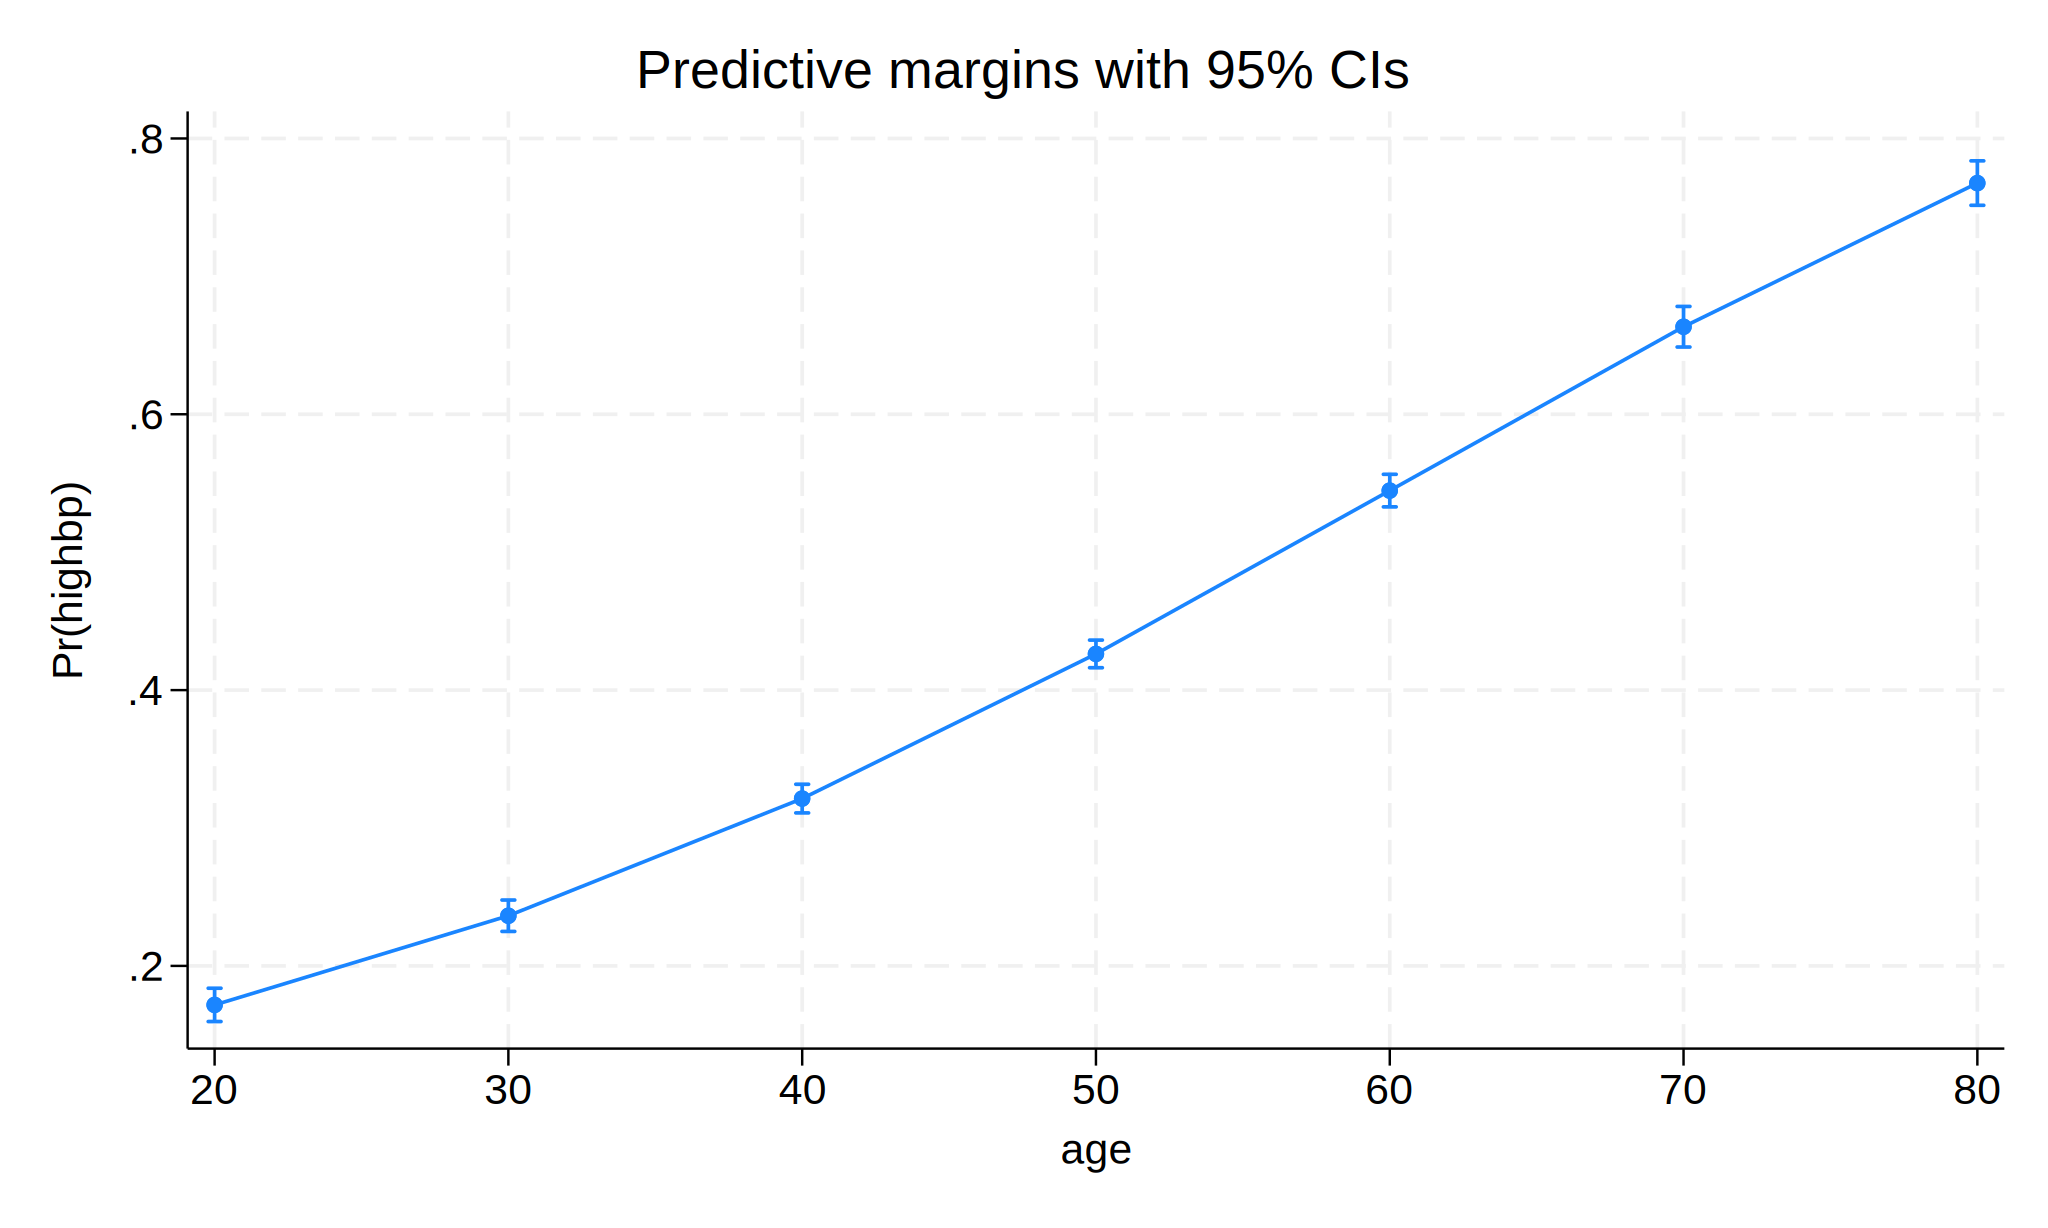

In [15]:
%%stata
quietly margins, at(age=(20(10)80))
marginsplot

We use margins to estimate the predicted probability of hypertension for all combinations of age and weight for values of age ranging from 20 to 80 years in increments of 5 and for values of weight ranging from 40 to 180 kilograms in increments of 5. The option saving(predictions, replace) saves the predictions to a dataset named predictions.dta. Our goal is to use Python to create a three-dimensional surface plot of those predictions.

The dataset predictions.dta contains the variables _at1 and _at2, which correspond to the values of age and weight that we specified in the at() option. The dataset also contains the variable _margin, which is the marginal prediction of the probability of high blood pressure. We rename those variables to age, weight, and pr_highbp respectively.

Lastly we store the dataset in Stata as a pandas dataframe named preddata in Python by specifying the -doutd argument.

In [16]:
%%stata -doutd preddata
quietly margins, at(age=(20(5)80) weight=(40(5)180)) ///
  saving(predictions, replace)

use predictions, clear
list _at1 _at2 _margin in 1/5
rename _at1 age
rename _at2 weight
rename _margin pr_highbp


. quietly margins, at(age=(20(5)80) weight=(40(5)180)) ///
>   saving(predictions, replace)

. 
. use predictions, clear
(Created by command margins; also see char list)

. list _at1 _at2 _margin in 1/5

     +------------------------+
     | _at1   _at2    _margin |
     |------------------------|
  1. |   20     40   .0200911 |
  2. |   20     45   .0274497 |
  3. |   20     50   .0374008 |
  4. |   20     55   .0507709 |
  5. |   20     60   .0685801 |
     +------------------------+

. rename _at1 age

. rename _at2 weight

. rename _margin pr_highbp

. 


We list the first five observations of the age, weight, pr_highbp columns within the dataframe.

In [17]:
preddata[['age', 'weight', 'pr_highbp']].head()

,age,weight,pr_highbp
0,20,40,0.020091
1,20,45,0.027450
2,20,50,0.037401
3,20,55,0.050771
4,20,60,0.068580


Next we use Python to create a three-dimensional surface plot. First, we set the graph size to be 10 by 8 inches using the figure() method in the pyplot module of the Matplotlib package. We use the axes() method to define a three-dimensional set of axes named ax and draw the surfrace plot with the plot_trisurf() method. Next we set the ticks and labels for the x, y, and z axes. Last, we adjust the elevation and azimuth of the plot.

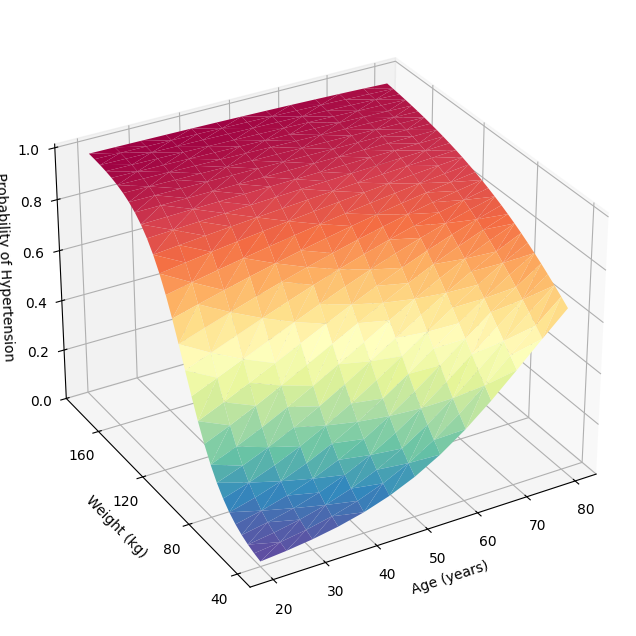

In [22]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import numpy as np

# define the axes

fig = plt.figure(1, figsize=(10, 8))
ax = plt.axes(projection='3d')

# plot
ax.plot_trisurf(preddata['age'], preddata['weight'], preddata['pr_highbp'],cmap=plt.cm.Spectral_r)

# set ticks and labels for x, y, and z axes

ax.set_xticks(np.arange(20, 90, step=10))
ax.set_yticks(np.arange(40, 200, step=40))
ax.set_zticks(np.arange( 0, 1.2, step=0.2))
ax.set_xlabel("Age (years)")
ax.set_ylabel("Weight (kg)")
ax.set_zlabel("Probability of Hypertension")

# adjust the view angle
ax.view_init(elev=30, azim=240)

# show the plot
plt.show()

We have demonstrated how to access Stata from Python, but you can also access Mata from Python using the mata magic; see The mata magic and Example 4: Work with Mata.